In [27]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
# Cargar datos desde el archivo CSV
archivo_csv = 'C:/Users/SAMSUNG/Downloads/SEMESTRE OCTAVO/ANALISIS DE DATOS/TAREA 3/Car details v3.csv'
datos = pd.read_csv(archivo_csv)

In [29]:
# Ver las primeras filas y descripción del DataFrame
print(datos.head())
print(datos.describe())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

Text(0.5, 1.0, 'Datos faltantes y atípicos')

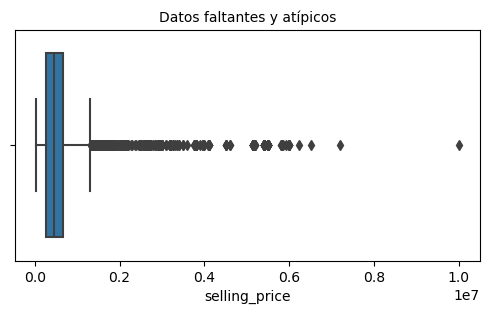

In [30]:
# Visualizar datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['selling_price'])
plt.title('Datos faltantes y atípicos', fontsize=10)

In [34]:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [35]:
# Dividir el dataset en Train y Test
X = datos[['year', 'km_driven', 'seats']]  # características relevantes seleccionadas
y = datos['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Entrenar el modelo de regresión lineal con los datos imputados
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [38]:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes en el conjunto de prueba
X_test_imputed = imputer.transform(X_test)

In [39]:
# Evaluar el modelo con los datos de prueba imputados
predictions = model.predict(X_test_imputed)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 535911151950.3664
R-squared: 0.1824197205664927


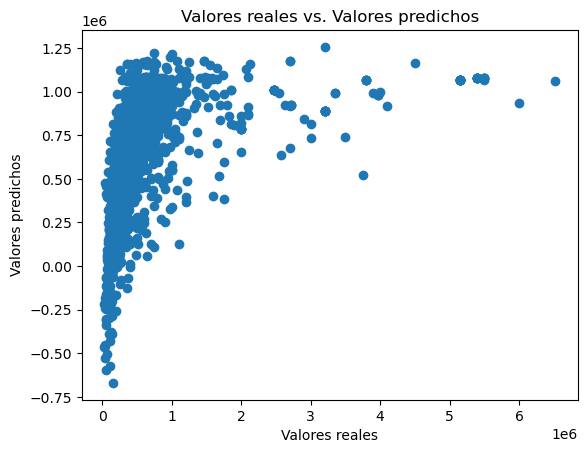

In [40]:
# Visualizar valores reales vs. valores predichos
plt.scatter(y_test, predictions)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Valores predichos")
plt.show()